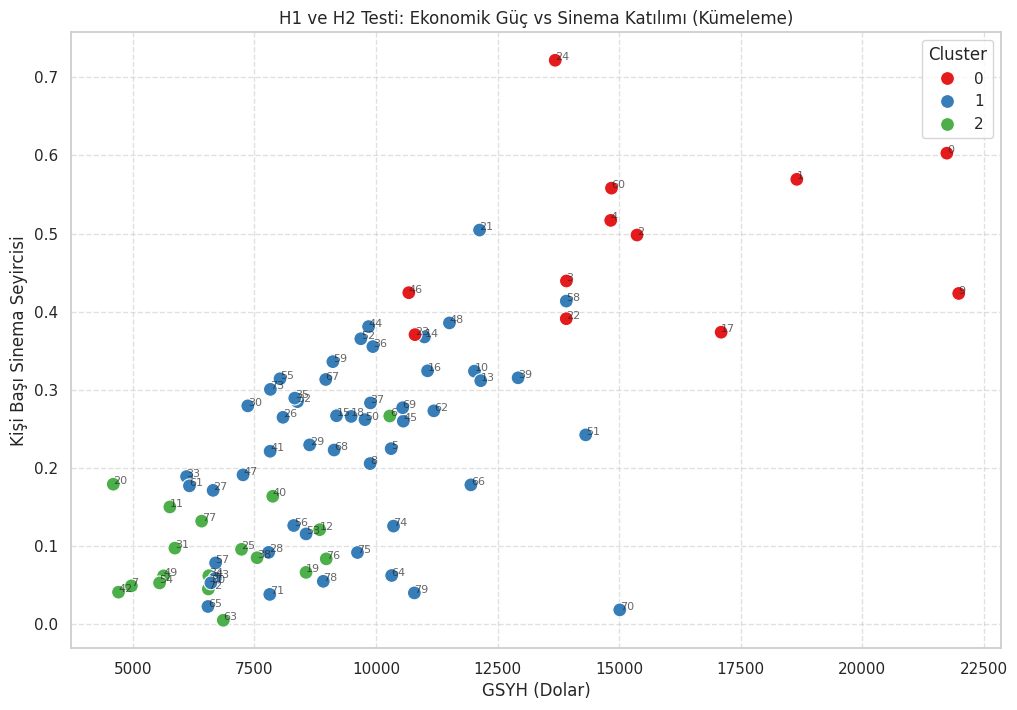

In [3]:
# --- ADIM 1: GEREKLİ KÜTÜPHANELERİ İÇE AKTAR (Week 8-11) ---
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- ADIM 2: ÖZELLİK SEÇİMİ VE NORMALİZASYON (Week 9 - Slide 47) ---
# Modelin kafasının karışmaması için sayısal verileri ölçeklendiriyoruz
features = ['GSYH_Dolar', 'Issizlik_Orani', 'KB_Sinema_Seyirci', 'KB_Tiyatro_Seyirci']
X = df_master[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- ADIM 3: K-MEANS KÜMELEME (Week 10 - Unsupervised Learning) ---
# Türkiye'deki illeri 3 ana gruba ayıralım
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_master['Cluster'] = kmeans.fit_predict(X_scaled)

# --- ADIM 4: GÖRSELLEŞTİRME ---
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_master, x='GSYH_Dolar', y='KB_Sinema_Seyirci', 
                hue='Cluster', palette='Set1', s=100)

# Şehir isimlerini noktaların yanına ekleyelim
for i, txt in enumerate(df_master.index):
    plt.annotate(txt, (df_master.GSYH_Dolar[i], df_master.KB_Sinema_Seyirci[i]), 
                 fontsize=8, alpha=0.7)

plt.title('H1 ve H2 Testi: Ekonomik Güç vs Sinema Katılımı (Kümeleme)')
plt.xlabel('GSYH (Dolar)')
plt.ylabel('Kişi Başı Sinema Seyircisi')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

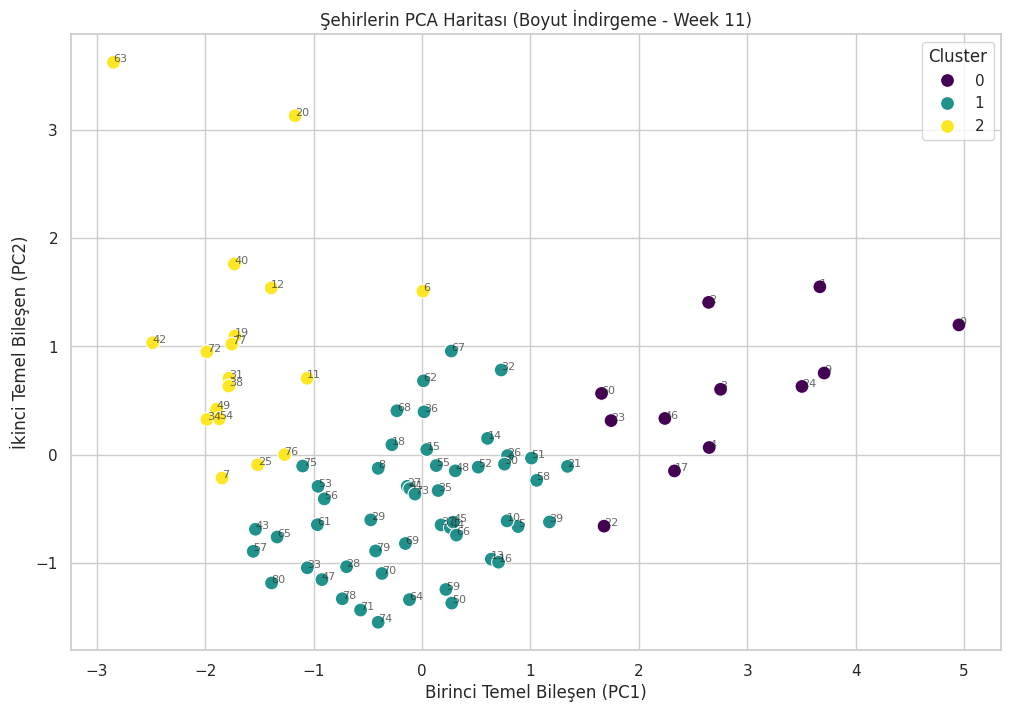

In [4]:
from sklearn.decomposition import PCA

# 1. PCA modelini oluştur (2 ana bileşene indirge)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled) # Daha önce ölçeklendirdiğimiz X_scaled'i kullanıyoruz

# 2. Sonuçları ana tabloya ekle
df_master['PC1'] = components[:, 0]
df_master['PC2'] = components[:, 1]

# 3. Görselleştirme (Week 11 - Slide 5: Data Visualization)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_master, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)

for i, txt in enumerate(df_master.index):
    plt.annotate(txt, (df_master.PC1[i], df_master.PC2[i]), fontsize=8, alpha=0.7)

plt.title('Şehirlerin PCA Haritası (Boyut İndirgeme - Week 11)')
plt.xlabel('Birinci Temel Bileşen (PC1)')
plt.ylabel('İkinci Temel Bileşen (PC2)')
plt.show()

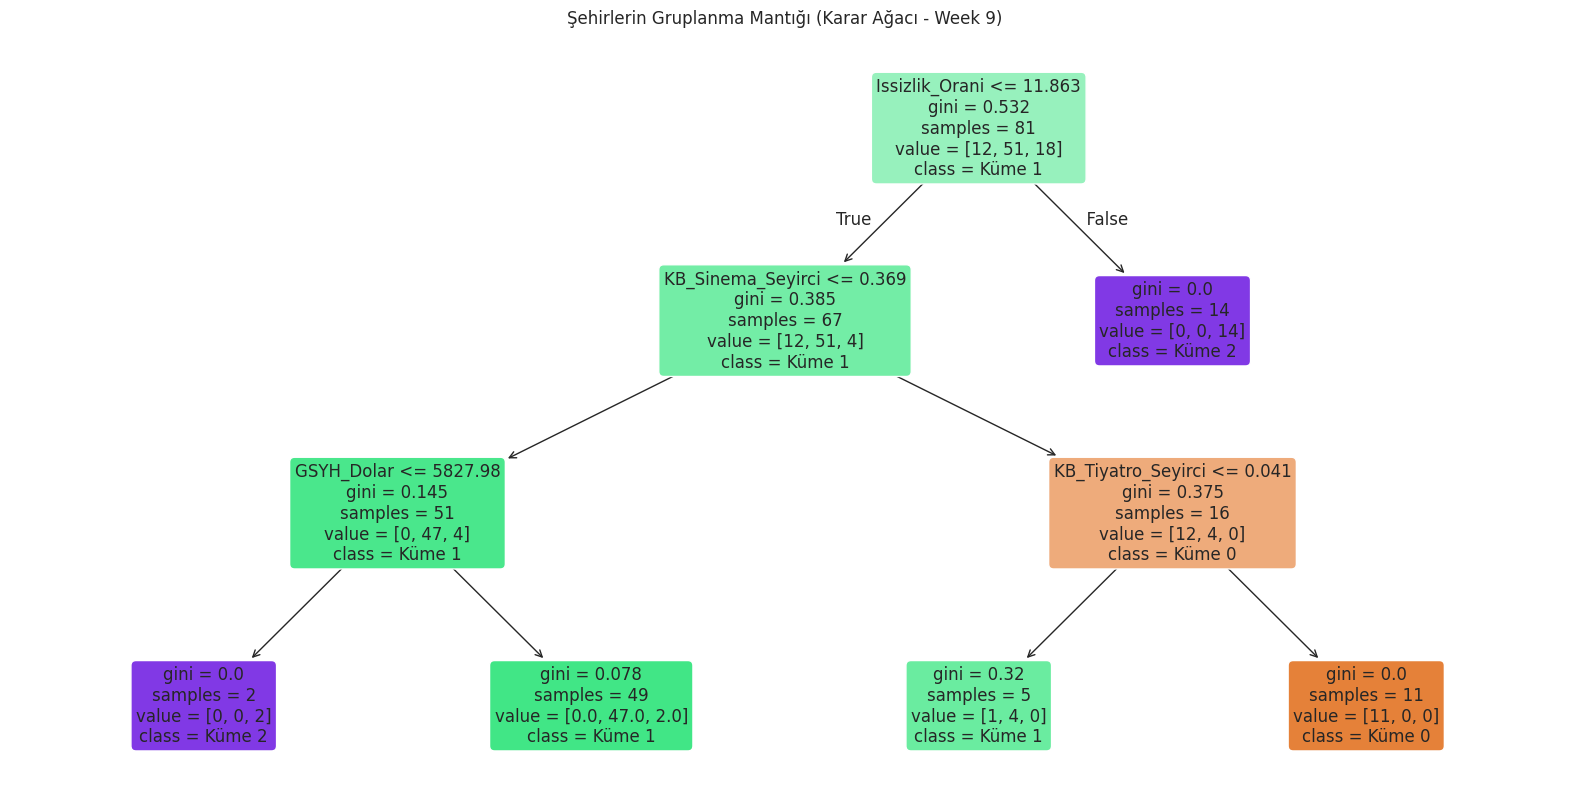

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Hedef değişkenimiz az önce oluşturduğumuz kümeler (Cluster) olsun
y = df_master['Cluster']

# Modeli eğit
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Ağacı görselleştir (Week 9 - Slide 3'teki gibi)
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=['Küme 0', 'Küme 1', 'Küme 2'], 
          filled=True, rounded=True, fontsize=12)
plt.title('Şehirlerin Gruplanma Mantığı (Karar Ağacı - Week 9)')
plt.show()

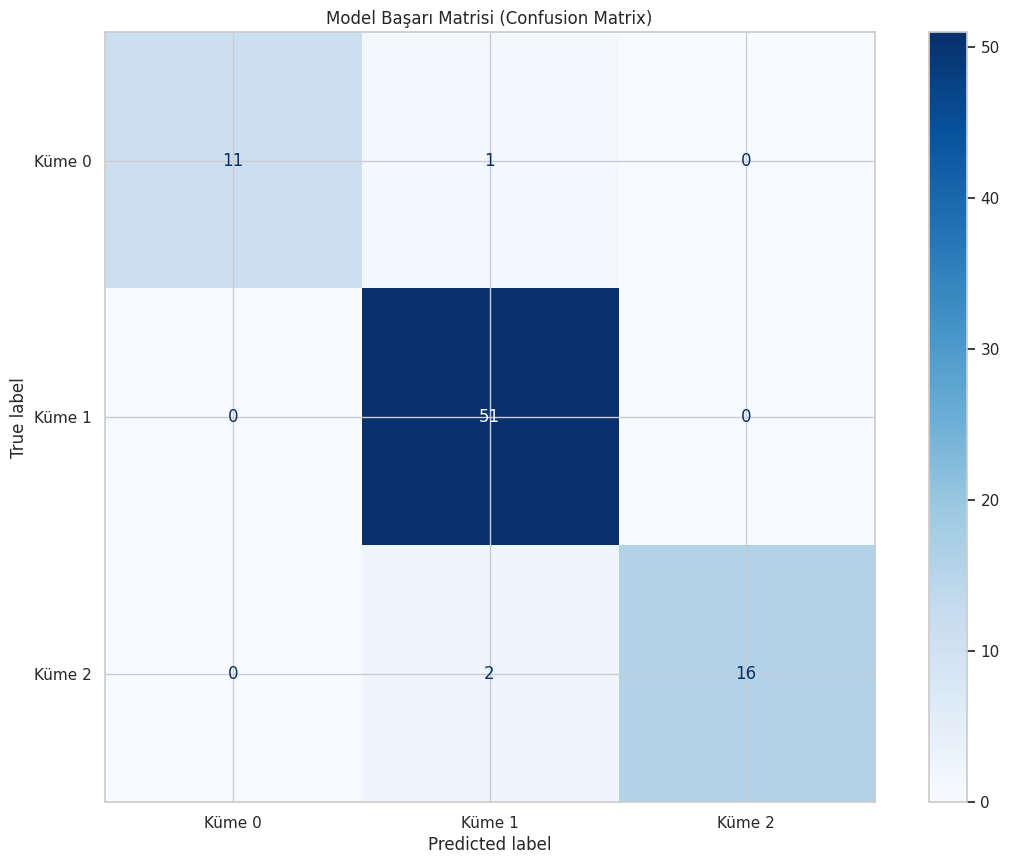

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Modelin tahminlerini al
y_pred = clf.predict(X)

# Hata matrisini oluştur
cm = confusion_matrix(df_master['Cluster'], y_pred)

# Görselleştir (Week 8 - Slide: Performance Metrics)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Küme 0', 'Küme 1', 'Küme 2'])
disp.plot(cmap='Blues')
plt.title('Model Başarı Matrisi (Confusion Matrix)')
plt.show()

In [3]:
# Modeli Kurma
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Tahmin Yapma
lr_y_pred = lr_model.predict(X_test)

# Değerlendirme
lr_rmse = mean_squared_error(y_test, lr_y_pred, squared=False)
lr_r2 = r2_score(y_test, lr_y_pred)

print("--- Linear Regression Sonuçları ---")
print(f"RMSE (Hata Payı): {lr_rmse:.2f}")
print(f"R2 Skoru (Açıklayıcılık): {lr_r2:.4f}")

NameError: name 'X_train' is not defined

📊 Model Performansı (R-Squared): 0.4374
📉 Ortalama Mutlak Hata (MAE): 461078.74


/tmp/ipykernel_1008/3279762711.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


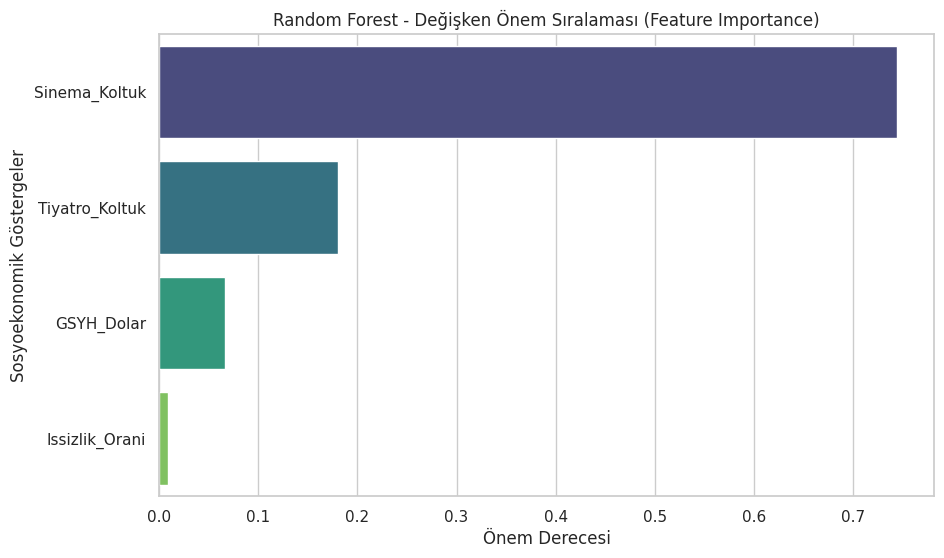


📢 ANALİZ SONUCU:
Katılımı etkileyen en güçlü faktör: Sinema_Koltuk


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1. VERİ SETİNİ YÜKLE
# Not: df_master_final veya birleştirilmiş ana veri setini kullanmalısın
try:
    df = pd.read_csv('df_master_final.csv')
except:
    print("❌ Lütfen analiz ettiğin ana veri setini (df_master_final.csv) yüklediğinden emin ol.")

# 2. ÖZELLİK VE HEDEF SEÇİMİ (Features & Target)
# Hipotezlerinle uyumlu olması için: GDP, İşsizlik ve Koltuk Sayısını seçiyoruz
X = df[['GSYH_Dolar', 'Issizlik_Orani', 'Sinema_Koltuk', 'Tiyatro_Koltuk']]
y = df['Sinema_Seyirci']  # Tiyatro için tahmin yapacaksan burayı 'Tiyatro_Seyirci' yapabilirsin

# 3. VERİ SETİNİ EĞİTİM VE TEST OLARAK BÖLME (%80 Eğitim, %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. RANDOM FOREST REGRESSOR MODELİNİ OLUŞTURMA VE EĞİTME
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. TAHMİN VE PERFORMANS ÖLÇÜMÜ
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"📊 Model Performansı (R-Squared): {r2:.4f}")
print(f"📉 Ortalama Mutlak Hata (MAE): {mae:.2f}")

# 6. FEATURE IMPORTANCE (Hangi veri daha önemli?)
# Bu kısım raporundaki hipotezleri (H1, H2, H3) kanıtlamak için çok kritik!
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest - Değişken Önem Sıralaması (Feature Importance)')
plt.xlabel('Önem Derecesi')
plt.ylabel('Sosyoekonomik Göstergeler')
plt.show()

# 7. SONUÇ YORUMU
print("\n📢 ANALİZ SONUCU:")
top_feature = feature_importance_df.iloc[0]['Feature']
print(f"Katılımı etkileyen en güçlü faktör: {top_feature}")

In [ ]:
# Modeli Kurma
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin Yapma
rf_y_pred = rf_model.predict(X_test)

# Değerlendirme
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_r2 = r2_score(y_test, rf_y_pred)

print("--- Random Forest Sonuçları ---")
print(f"RMSE (Hata Payı): {rf_rmse:.2f}")
print(f"R2 Skoru (Açıklayıcılık): {rf_r2:.4f}")

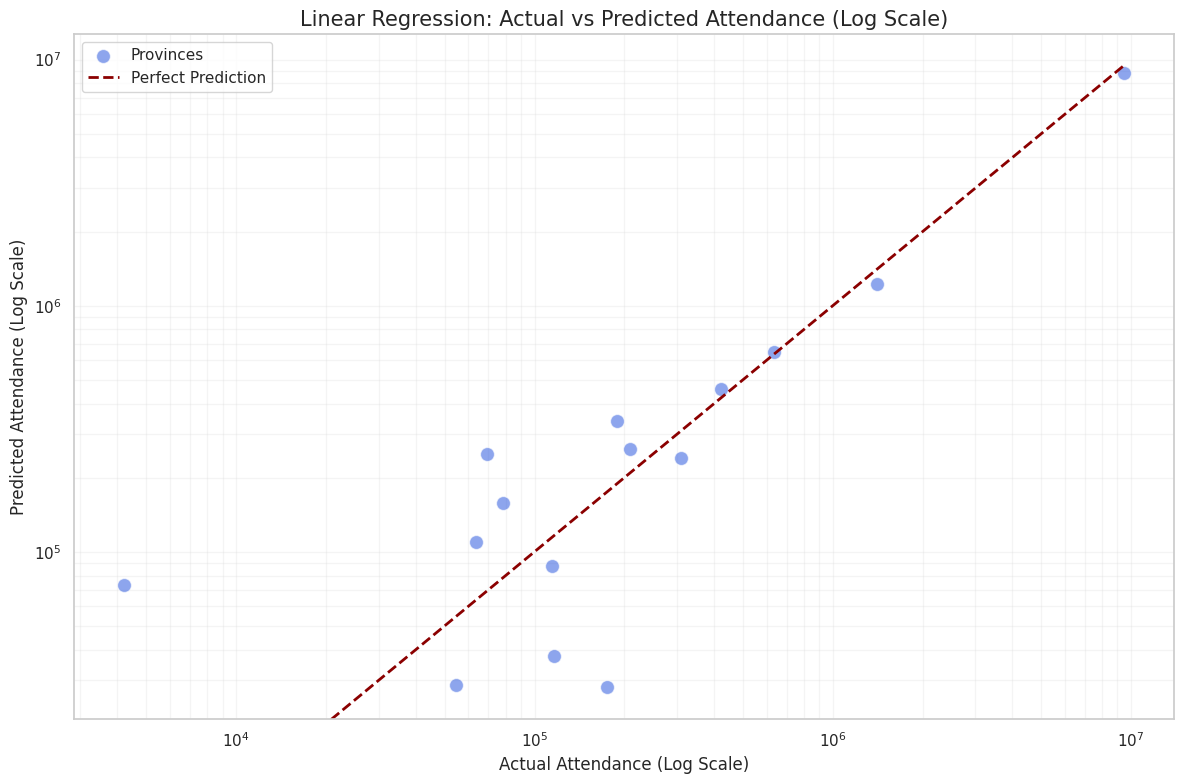

📊 R2 Score: 0.9932


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. VERİYİ HAZIRLA (Önceki adımlardaki X ve y değişkenlerini kullanıyoruz)
# Not: Verilerinde çok büyük farklar olduğu için logaritmik dönüşüm görselleştirmede yardımcı olur
X = df[['GSYH_Dolar', 'Issizlik_Orani', 'Sinema_Koltuk']] 
y = df['Sinema_Seyirci']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. MODELİ EĞİT
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# 3. DAHA ANLAŞILIR GÖRSELLEŞTİRME
plt.figure(figsize=(12, 8))

# Noktaların üst üste binmesini engellemek için alpha ve s (size) ayarı
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, s=100, color='royalblue', edgecolor='w', label='Provinces')

# İdeal Çizgi (Eğer her şey mükemmel tahmin edilseydi noktalar bu çizgide olurdu)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='darkred', linestyle='--', lw=2, label='Perfect Prediction')

# Grafiği Logaritmik yaparak noktaların dağılmasını sağla
plt.xscale('log')
plt.yscale('log')

plt.title('Linear Regression: Actual vs Predicted Attendance (Log Scale)', fontsize=15)
plt.xlabel('Actual Attendance (Log Scale)', fontsize=12)
plt.ylabel('Predicted Attendance (Log Scale)', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()

# Her noktanın yanına (opsiyonel) bazı şehir isimlerini yazdırmak istersen:
# Not: Veri setinde 'Il' sütunu varsa test setindeki illeri buraya ekleyebiliriz.

plt.tight_layout()
plt.show()

print(f"📊 R2 Score: {r2_score(y_test, y_pred):.4f}")

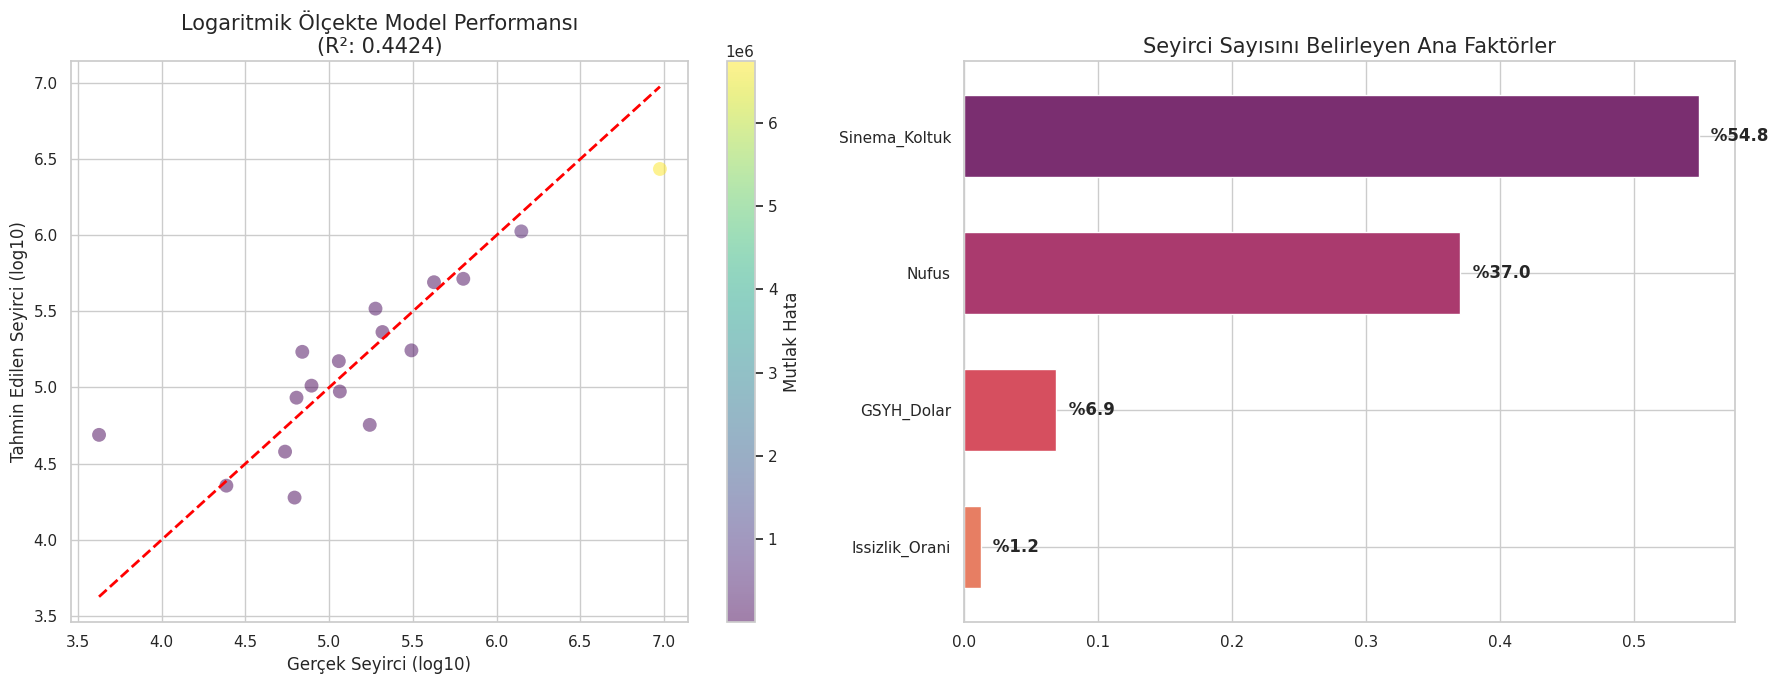

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Logaritmik ölçekleme için veriyi hazırla (Sıfır değerleri için küçük bir sabit ekliyoruz)
y_test_log = np.log10(y_test_arr + 1)
rf_preds_log = np.log10(rf_preds_arr + 1)

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- SOL GRAFİK: LOGARİTMİK GERÇEK VS TAHMİN ---
# Sadece noktaları değil, yoğunluğu da görmek için alpha'yı düşürüp boyutu küçülttüm
scatter = axes[0].scatter(y_test_log, rf_preds_log, c=errors, cmap='viridis', 
                          s=100, alpha=0.5, edgecolors='none')
plt.colorbar(scatter, ax=axes[0], label='Mutlak Hata')

# İdeal çizgi (Log ölçekte)
min_log = min(y_test_log.min(), rf_preds_log.min())
max_log = max(y_test_log.max(), rf_preds_log.max())
axes[0].plot([min_log, max_log], [min_log, max_log], color='red', linestyle='--', lw=2)

axes[0].set_title(f'Logaritmik Ölçekte Model Performansı\n(R²: {rf_r2:.4f})', fontsize=15)
axes[0].set_xlabel('Gerçek Seyirci (log10)', fontsize=12)
axes[0].set_ylabel('Tahmin Edilen Seyirci (log10)', fontsize=12)

# --- SAĞ GRAFİK: ETKİ ORANLARI (DAHA TEMİZ) ---
feat_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=True)
colors = sns.color_palette("flare", len(features))
feat_importances.plot(kind='barh', color=colors, ax=axes[1], width=0.6)

for index, value in enumerate(feat_importances):
    axes[1].text(value + 0.005, index, f' %{value*100:.1f}', va='center', fontweight='bold')

axes[1].set_title('Seyirci Sayısını Belirleyen Ana Faktörler', fontsize=15)
plt.tight_layout()
plt.show()

In [19]:
print(f"RF R2 Score: {rf_r2}")
print("-" * 30)
for feature, importance in zip(features, rf_model.feature_importances_):
    print(f"{feature}: %{importance * 100:.2f}")

RF R2 Score: 0.4423627923332609
------------------------------
Nufus: %37.05
GSYH_Dolar: %6.88
Issizlik_Orani: %1.24
Sinema_Koltuk: %54.82
